## Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler



- `pandas`: For data manipulation and analysis.
- `matplotlib.pyplot`: For visualizations.
- `seaborn`: For statistical graphics.
- `sklearn.model_selection.train_test_split`: To split the dataset into training and testing.
- `sklearn.metrics.roc_auc_score`: To evaluate model performance.
- `sklearn.ensemble`: Includes `RandomForestClassifier`, `GradientBoostingClassifier`, and `AdaBoostClassifier` for classification tasks.
- `sklearn.linear_model.LogisticRegression`: For logistic regression.
- `sklearn.tree.DecisionTreeClassifier`: For decision tree-based classification.
- `sklearn.preprocessing`: Includes `LabelEncoder` for categorical encoding and `StandardScaler` for normalization.

## Load Datasets

In [2]:
# Load datasets
demographic_details = pd.read_csv('demographic_details.csv')
medical_history = pd.read_csv('medical_history.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test_share.csv')



- `demographic_details.csv`: Contains demographic data of patients.
- `medical_history.csv`: Includes patient medical history.
- `train.csv`: Training dataset for machine learning models.
- `test_share.csv`: Testing dataset used for evaluating model performance.

The datasets are loaded using `pandas.read_csv()`.

## Convert Date Columns to Datetime Format

In [3]:
# Convert ScheduledDay and AppointmentDay to datetime format
train["ScheduledDay"] = pd.to_datetime(train["ScheduledDay"])
train["AppointmentDay"] = pd.to_datetime(train["AppointmentDay"])

test["ScheduledDay"] = pd.to_datetime(test["ScheduledDay"])
test["AppointmentDay"] = pd.to_datetime(test["AppointmentDay"])



- The `ScheduledDay` and `AppointmentDay` columns in both the training and test datasets are converted to datetime format using `pd.to_datetime()`.
- This conversion ensures proper handling of date-based calculations.

## Preview Data

In [4]:
train.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,SMS_received,No-show
0,2.987250e+13,5642903,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,No
1,5.589978e+14,5642503,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,No
2,8.679512e+11,5642828,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,No
3,8.841186e+12,5642494,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,No
4,9.598513e+13,5626772,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,0,No


In [5]:
test.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,SMS_received
0,7.223289e+12,5640433,2016-04-29 10:43:14+00:00,2016-04-29 00:00:00+00:00,0
1,8.632298e+14,5616091,2016-04-25 13:29:16+00:00,2016-04-29 00:00:00+00:00,1
2,4.438587e+14,5637909,2016-04-29 07:30:31+00:00,2016-04-29 00:00:00+00:00,0
3,4.179932e+13,5638018,2016-04-29 07:37:45+00:00,2016-04-29 00:00:00+00:00,0
4,3.647762e+13,5614045,2016-04-25 10:01:13+00:00,2016-04-29 00:00:00+00:00,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99490 entries, 0 to 99489
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   PatientId       99490 non-null  float64            
 1   AppointmentID   99490 non-null  int64              
 2   ScheduledDay    99490 non-null  datetime64[ns, UTC]
 3   AppointmentDay  99490 non-null  datetime64[ns, UTC]
 4   SMS_received    99490 non-null  int64              
 5   No-show         99490 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(1), int64(2), object(1)
memory usage: 4.6+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10854 entries, 0 to 10853
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   PatientId       10854 non-null  float64            
 1   AppointmentID   10854 non-null  int64              
 2   ScheduledDay    10854 non-null  datetime64[ns, UTC]
 3   AppointmentDay  10854 non-null  datetime64[ns, UTC]
 4   SMS_received    10854 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(2)
memory usage: 424.1 KB


In [8]:
train.describe()

,PatientId,AppointmentID,SMS_received
count,9.949000e+04,9.949000e+04,99490.000000
mean,1.483680e+14,5.675299e+06,0.321138
std,2.569592e+14,7.125577e+04,0.466916
min,3.921784e+04,5.030230e+06,0.000000
25%,4.196438e+12,5.640269e+06,0.000000
50%,3.215115e+13,5.680583e+06,0.000000
75%,9.456366e+13,5.725442e+06,1.000000
max,9.999816e+14,5.790484e+06,1.000000


In [9]:
test.describe()

,PatientId,AppointmentID,SMS_received
count,1.085400e+04,1.085400e+04,10854.000000
mean,1.440665e+14,5.675782e+06,0.322646
std,2.499746e+14,7.017684e+04,0.467510
min,9.531312e+07,5.134220e+06,0.000000
25%,4.283541e+12,5.640301e+06,0.000000
50%,3.223959e+13,5.679546e+06,0.000000
75%,9.341366e+13,5.725307e+06,1.000000
max,9.999465e+14,5.790481e+06,1.000000


In [10]:
train.isnull().sum()

PatientId         0
AppointmentID     0
ScheduledDay      0
AppointmentDay    0
SMS_received      0
No-show           0
dtype: int64

In [11]:
test.isnull().sum()

PatientId         0
AppointmentID     0
ScheduledDay      0
AppointmentDay    0
SMS_received      0
dtype: int64

## Fixing Column Name Typo

In [12]:
# Standardize column names (fix potential typos)
medical_history.rename(columns={"Handcap": "Handicap"}, inplace=True)



- The column `"Handcap"` in the `medical_history` dataset is renamed to `"Handicap"` using `rename()`.
- This ensures consistency in column names.


## Merging Datasets

In [13]:
# Merge demographic and medical history data with train and test datasets
train_merged = train.merge(demographic_details, on="PatientId", how="left").merge(medical_history, on="PatientId", how="left")
test_merged = test.merge(demographic_details, on="PatientId", how="left").merge(medical_history, on="PatientId", how="left")



- The training and test datasets are merged with `demographic_details` and `medical_history` using `PatientId` as the common key.
- The merge is performed using a left join to retain all records from the primary dataset.

This ensures all relevant information is included in a single dataset for model training.


## Encoding Categorical Variables

In [14]:
# Encode categorical variables
train_merged["Gender"] = train_merged["Gender"].map({"F": 0, "M": 1})  # Female = 0, Male = 1
test_merged["Gender"] = test_merged["Gender"].map({"F": 0, "M": 1})



- The `Gender` column is encoded as follows:
  - Female (`F`) → `0`
  - Male (`M`) → `1`
- This transformation allows machine learning models to process gender as a numerical feature.


## Encoding the Target Variable

In [15]:
# Encode target variable No-show (Yes = 1, No = 0)
train_merged["No-show"] = train_merged["No-show"].map({"Yes": 1, "No": 0})



- The target column `"No-show"` is encoded as:
  - `"Yes"` (patient missed appointment) → `1`
  - `"No"` (patient attended appointment) → `0`
- This conversion is necessary for binary classification models.


## Feature Engineering and Data Processing

#### Dropping Unnecessary Columns

In [16]:
# Drop unnecessary columns (PatientId, AppointmentID)
train_merged.drop(columns=["PatientId", "AppointmentID"], inplace=True)
test_merged.drop(columns=["PatientId", "AppointmentID"], inplace=True)



- The `PatientId` and `AppointmentID` columns are removed as they are not useful for model training.
- These columns do not contribute to prediction and may introduce noise.


#### Creating a New Feature (Waiting Time)

In [17]:
# Feature Engineering
train_merged["WaitingTime"] = (train_merged["AppointmentDay"] - train_merged["ScheduledDay"]).dt.days
test_merged["WaitingTime"] = (test_merged["AppointmentDay"] - test_merged["ScheduledDay"]).dt.days



- A new feature `WaitingTime` is created by calculating the difference (in days) between `AppointmentDay` and `ScheduledDay`.
- This feature helps in understanding if waiting time influences appointment attendance.


#### Creating Age Groups

In [18]:
bins = [0, 18, 40, 60, 100]
labels = ["Child", "YoungAdult", "Adult", "Senior"]
train_merged["AgeGroup"] = pd.cut(train_merged["Age"], bins=bins, labels=labels)
test_merged["AgeGroup"] = pd.cut(test_merged["Age"], bins=bins, labels=labels)



- The `Age` column is divided into four categories:
  - `Child` (0-18)
  - `YoungAdult` (19-40)
  - `Adult` (41-60)
  - `Senior` (61-100)
- This categorization helps in analyzing how age influences appointment attendance.


#### Encoding Categorical Variables

In [19]:
le = LabelEncoder()
train_merged["Neighbourhood"] = le.fit_transform(train_merged["Neighbourhood"])
test_merged["Neighbourhood"] = le.transform(test_merged["Neighbourhood"])
train_merged["AgeGroup"] = le.fit_transform(train_merged["AgeGroup"].astype(str))
test_merged["AgeGroup"] = le.transform(test_merged["AgeGroup"].astype(str))



- The `Neighbourhood` and `AgeGroup` columns are converted into numerical values using `LabelEncoder()`.
- Label encoding assigns a unique number to each category.


#### Dropping Date Columns

In [20]:
train_merged.drop(columns=["ScheduledDay", "AppointmentDay"], inplace=True)
test_merged.drop(columns=["ScheduledDay", "AppointmentDay"], inplace=True)



- Since `WaitingTime` has already been extracted, `ScheduledDay` and `AppointmentDay` are removed.
- Removing unnecessary columns avoids redundancy in the dataset.

#### Scaling Numerical Features

In [21]:
scaler = StandardScaler()
numerical_features = ["Age", "WaitingTime"]
train_merged[numerical_features] = scaler.fit_transform(train_merged[numerical_features])
test_merged[numerical_features] = scaler.transform(test_merged[numerical_features])


- The `Age` and `WaitingTime` features are scaled using `StandardScaler()`.
- Standardization ensures all features have a mean of `0` and a standard deviation of `1`, improving model performance.


#### Outlier Detection and Removal

In [22]:
# Outlier Detection and Removal
numerical_features = ["Age", "WaitingTime"]
for feature in numerical_features:
    Q1 = train_merged[feature].quantile(0.25)
    Q3 = train_merged[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_merged = train_merged[(train_merged[feature] >= lower_bound) & (train_merged[feature] <= upper_bound)]




- The Interquartile Range (IQR) method is used to identify and remove outliers.
- Outliers are removed to ensure the model is not biased by extreme values.


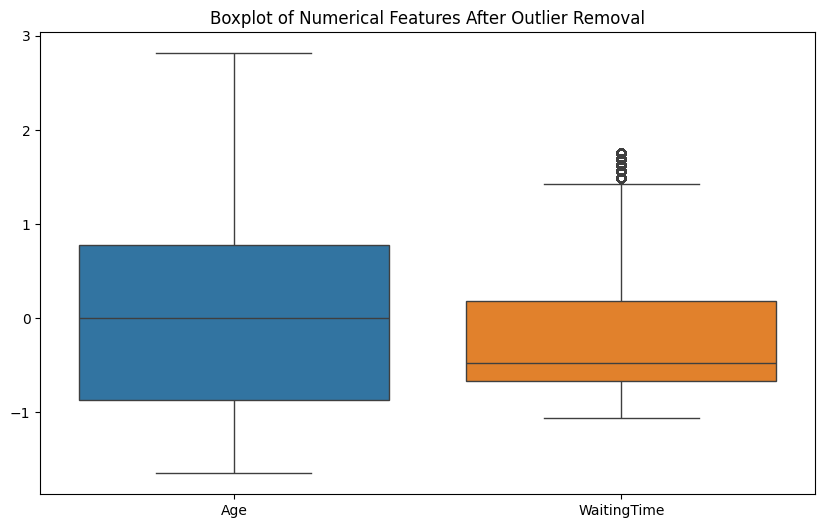

In [23]:
# Outlier Detection and Visualization
plt.figure(figsize=(10,6))
sns.boxplot(data=train_merged[numerical_features])
plt.title("Boxplot of Numerical Features After Outlier Removal")
plt.show()

#### Correlation Analysis

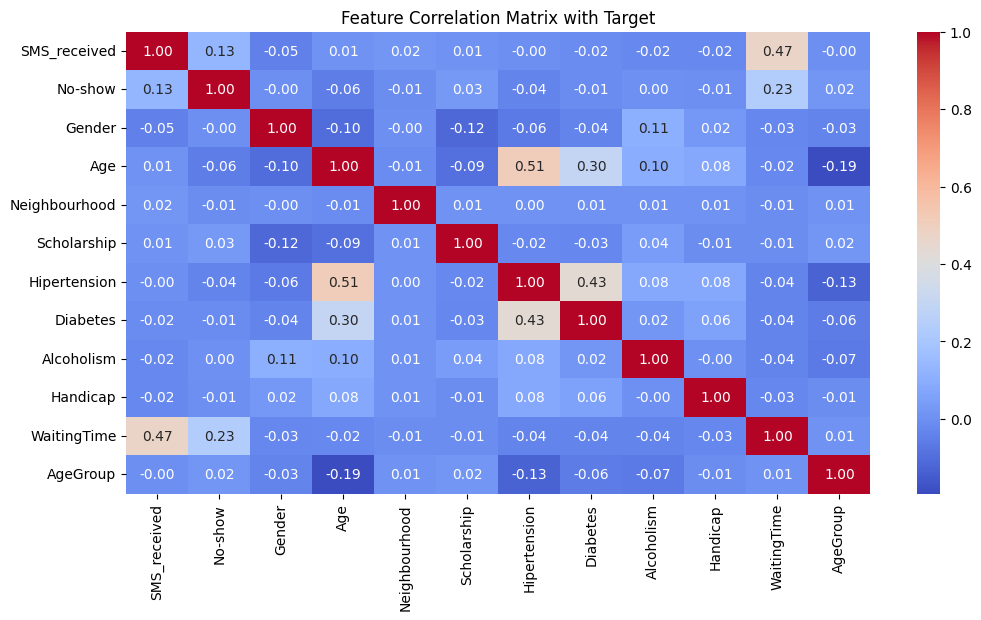

In [24]:
# Correlation Analysis
plt.figure(figsize=(12,6))
sns.heatmap(train_merged.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix with Target")
plt.show()

#### Visualizing Categorical Features Against Target

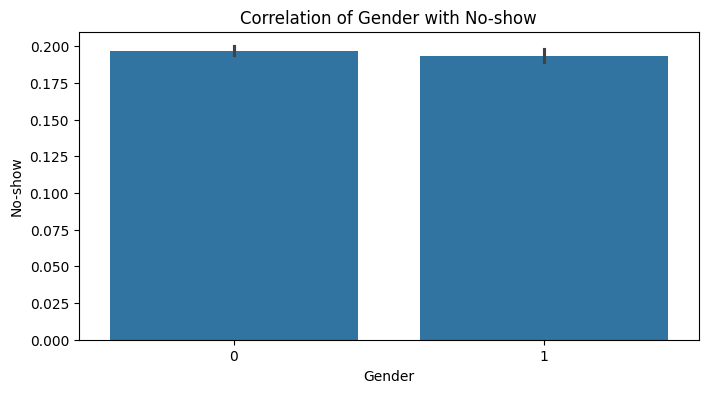

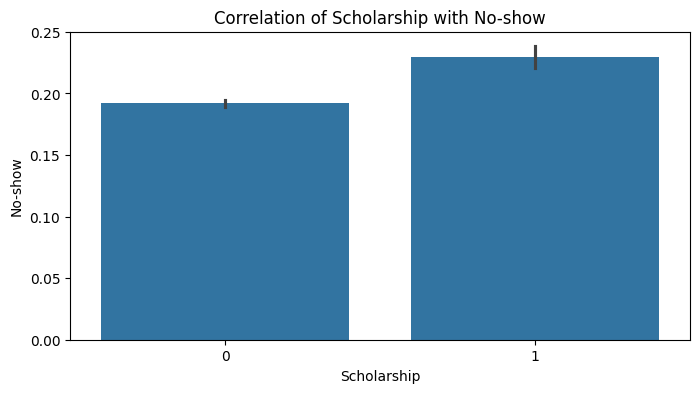

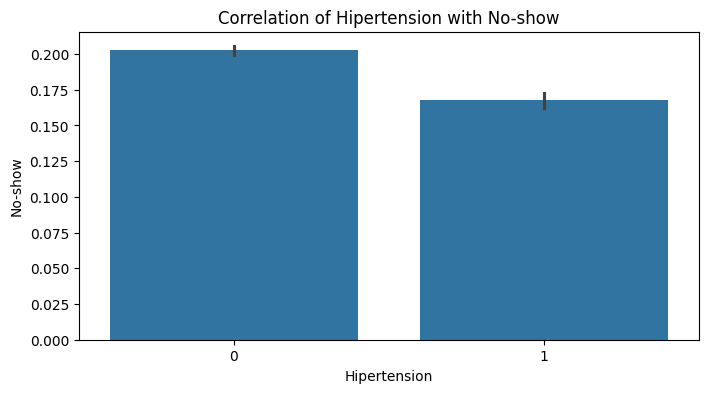

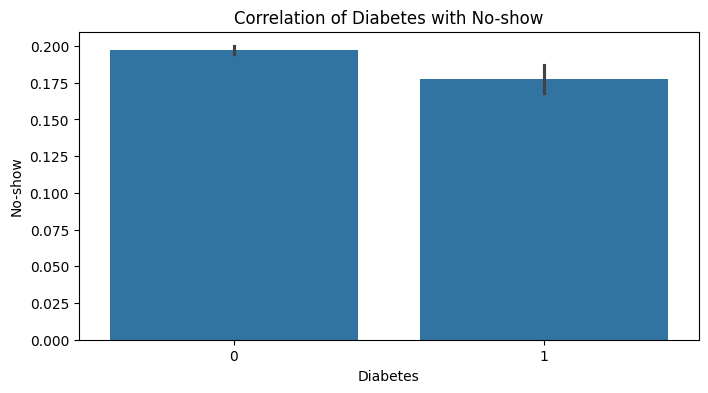

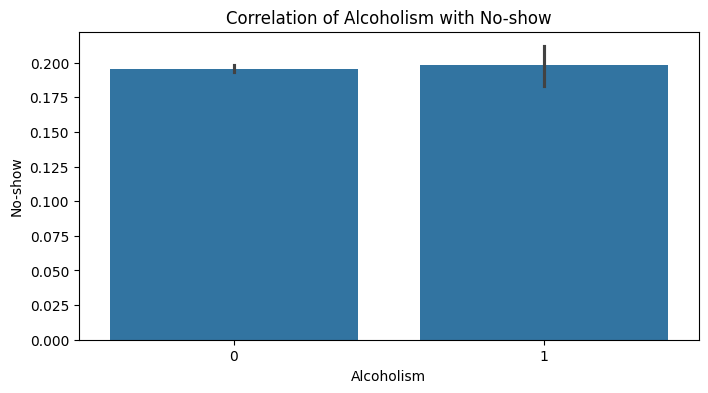

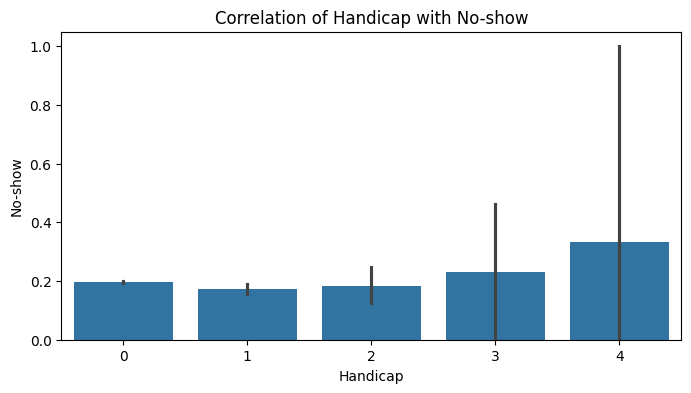

In [25]:
# Categorical vs Target Visualization
categorical_features = ["Gender", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handicap"]
for feature in categorical_features:
    plt.figure(figsize=(8,4))
    sns.barplot(x=feature, y="No-show", data=train_merged)
    plt.title(f"Correlation of {feature} with No-show")
    plt.show()


## Model Training, Evaluation, and Interpretation

#### Data Visualization

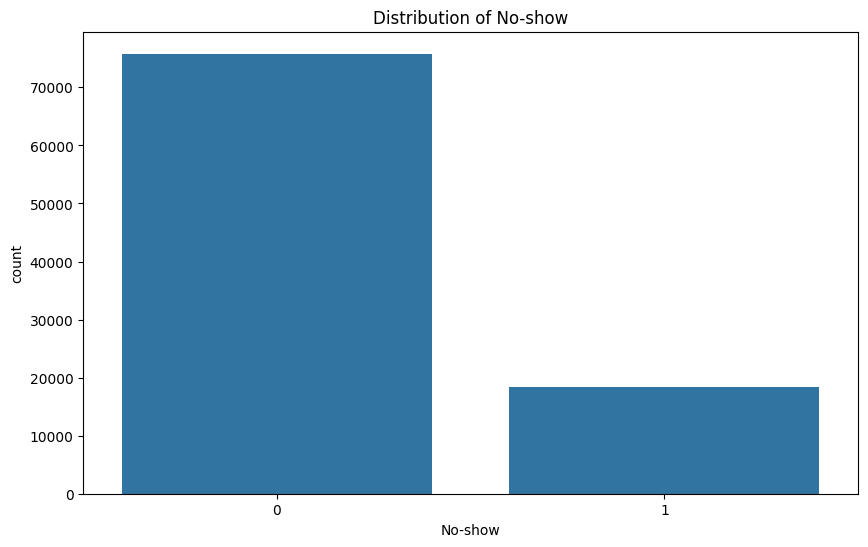

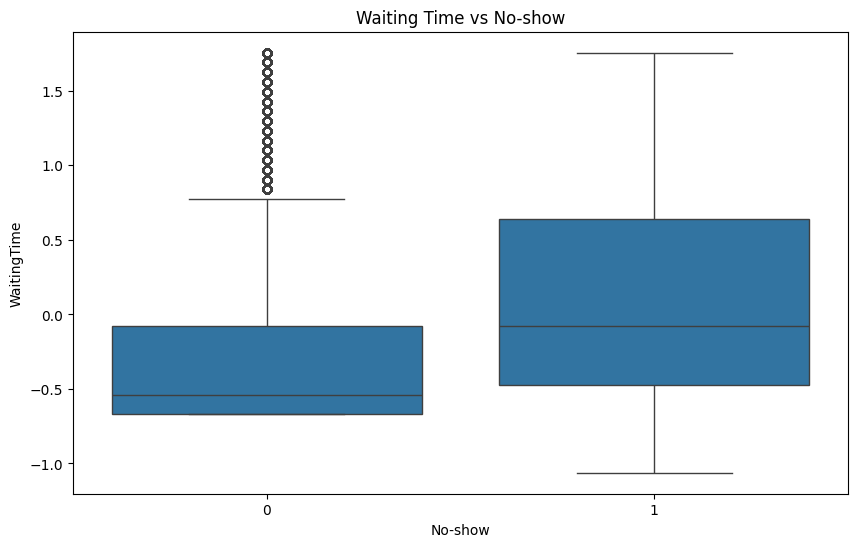

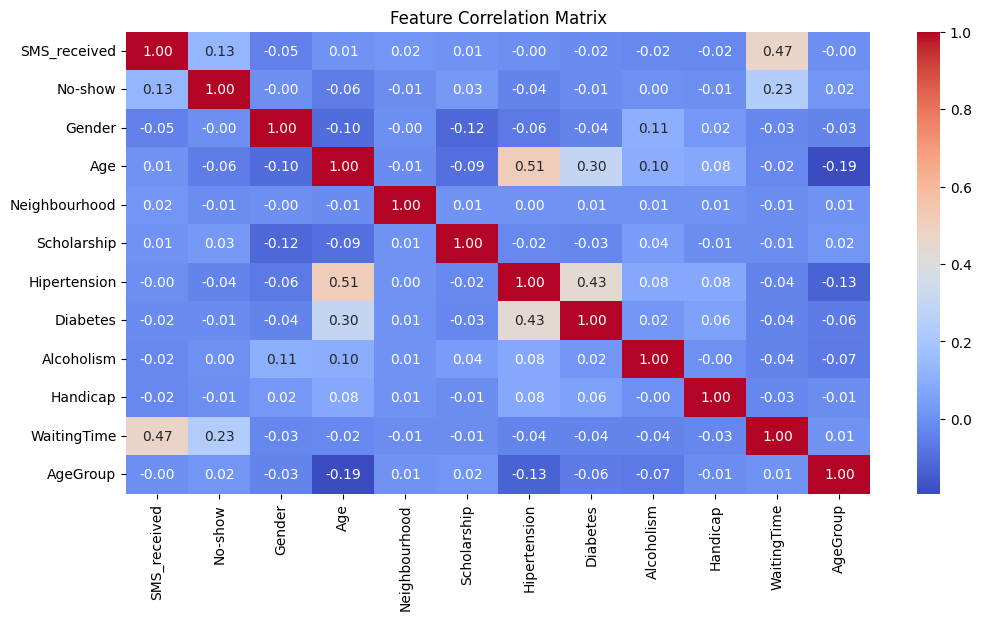

In [26]:
# Visualizations
plt.figure(figsize=(10,6))
sns.countplot(x="No-show", data=train_merged)
plt.title("Distribution of No-show")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x="No-show", y="WaitingTime", data=train_merged)
plt.title("Waiting Time vs No-show")
plt.show()

plt.figure(figsize=(12,6))
sns.heatmap(train_merged.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

#### Defining Features and Target

In [27]:
# Define features and target
X = train_merged.drop(columns=["No-show"])
y = train_merged["No-show"]



- The `X` dataset includes all features except the target column (`No-show`).
- The `y` dataset represents the target variable (`No-show`), where `1` means a patient missed their appointment.


#### Splitting Data into Train and Validation Sets

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Defining Machine Learning Models

In [29]:
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

best_model = None
best_auc = 0


- Five classification models are considered:
  - **Gradient Boosting**
  - **Random Forest**
  - **Logistic Regression**
  - **Decision Tree**
  - **AdaBoost**
- The goal is to find the model with the best **AUC (Area Under the Curve)** score.


#### Training Models and Evaluating AUC Score

In [30]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    auc_score = roc_auc_score(y_val, y_pred)
    print(f"{name} AUC Score: {auc_score}")
    
    if auc_score > best_auc:
        best_auc = auc_score
        best_model = model

print(f"Best model: {best_model} with AUC Score: {best_auc}")

Gradient Boosting AUC Score: 0.7377293682999558
Random Forest AUC Score: 0.7108752303699082
Logistic Regression AUC Score: 0.6882892136802523
Decision Tree AUC Score: 0.5849817242257568


c:\Users\D MADHAN MOHAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost AUC Score: 0.7327491482752305
Best model: GradientBoostingClassifier() with AUC Score: 0.7377293682999558




- Each model is trained on `X_train` and `y_train`.
- Predictions (`predict_proba`) are generated for `X_val` to calculate the **AUC score**.
- The best-performing model is selected based on the highest **AUC score**.


#### Training the Best Model on Full Dataset

In [31]:
# Train the best model on the full dataset
best_model.fit(X, y)
test_probs = best_model.predict_proba(test_merged)[:, 1]

#### Ensuring Correct Predictions Length

In [32]:
if len(test_probs) != len(test):
    raise ValueError(f"Error: The number of rows in the submission file ({len(test_probs)}) does not match the test dataset ({len(test)})!")



- This check ensures that the number of predictions matches the number of test samples.
- If a mismatch occurs, an error is raised to prevent incorrect submissions.


## ROC Curve Visualization

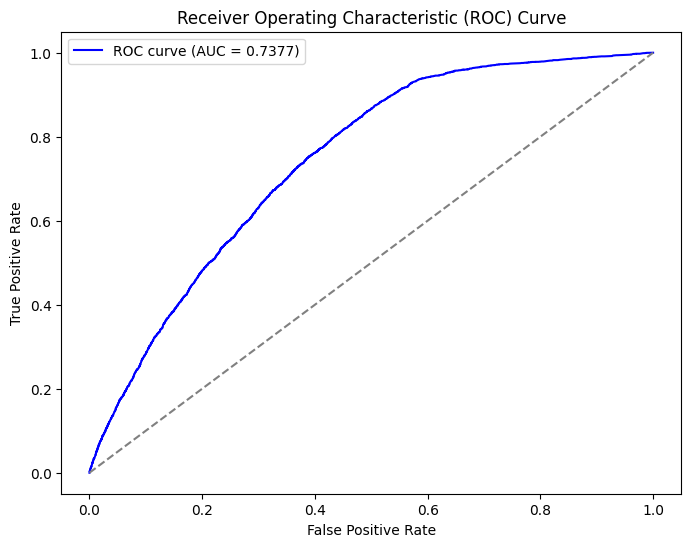

In [33]:
from sklearn.metrics import roc_curve

# Predict probabilities for the validation set
y_val_pred = best_model.predict_proba(X_val)[:, 1]

# AUC Score Visualization
fpr, tpr, _ = roc_curve(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {best_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



- The **ROC (Receiver Operating Characteristic) Curve** is plotted for the best model.
- It shows the trade-off between **False Positive Rate (FPR)** and **True Positive Rate (TPR)**.
- A higher AUC indicates a better-performing model.


## Feature Importance Analysis

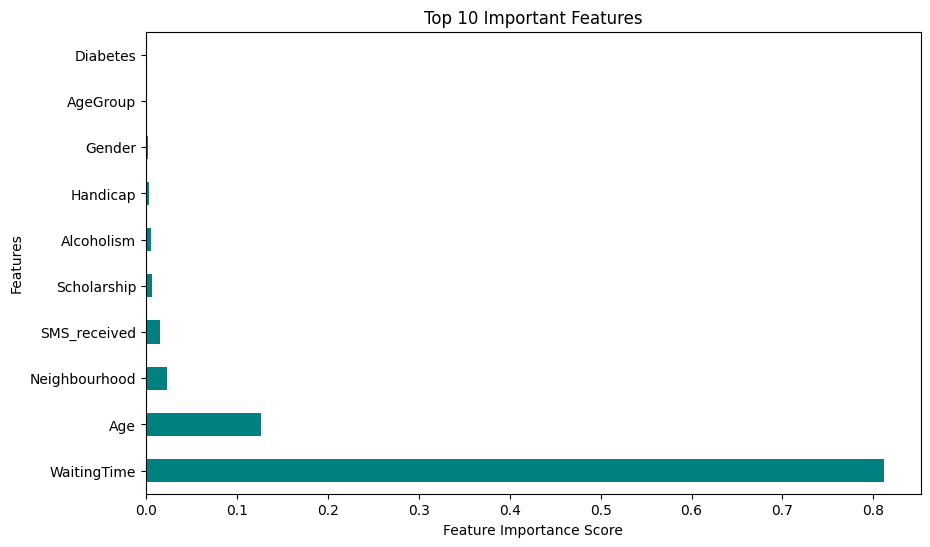

In [34]:
# Feature Importance Plot (only applicable for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
    feature_importances.nlargest(10).plot(kind='barh', figsize=(10,6), color='teal')
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title("Top 10 Important Features")
    plt.show()



- For tree-based models, **feature importance** scores are calculated.
- The top 10 most important features are plotted to understand which variables contribute the most to predictions.


## Distribution of Predicted Probabilities

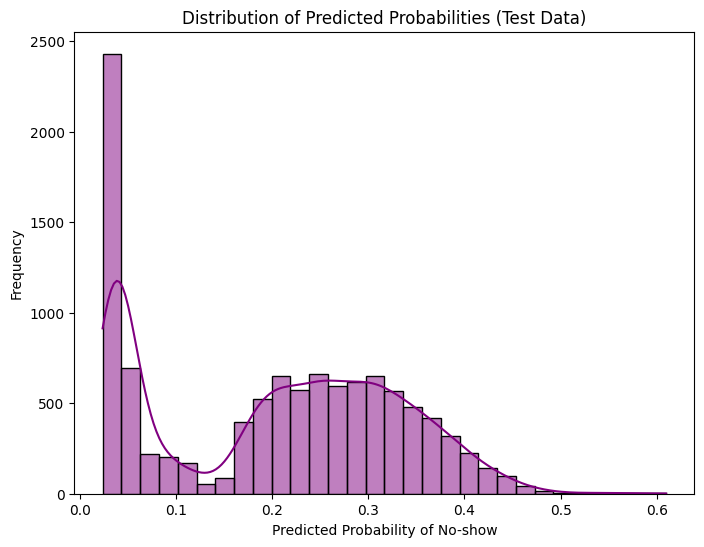

In [35]:
plt.figure(figsize=(8,6))
sns.histplot(test_probs, bins=30, kde=True, color="purple")
plt.title("Distribution of Predicted Probabilities (Test Data)")
plt.xlabel("Predicted Probability of No-show")
plt.ylabel("Frequency")
plt.show()



- A histogram is plotted to visualize the predicted probabilities of patients missing their appointment.
- The **KDE (Kernel Density Estimation)** helps understand the distribution.


#### Boxplot for Important Numerical Features

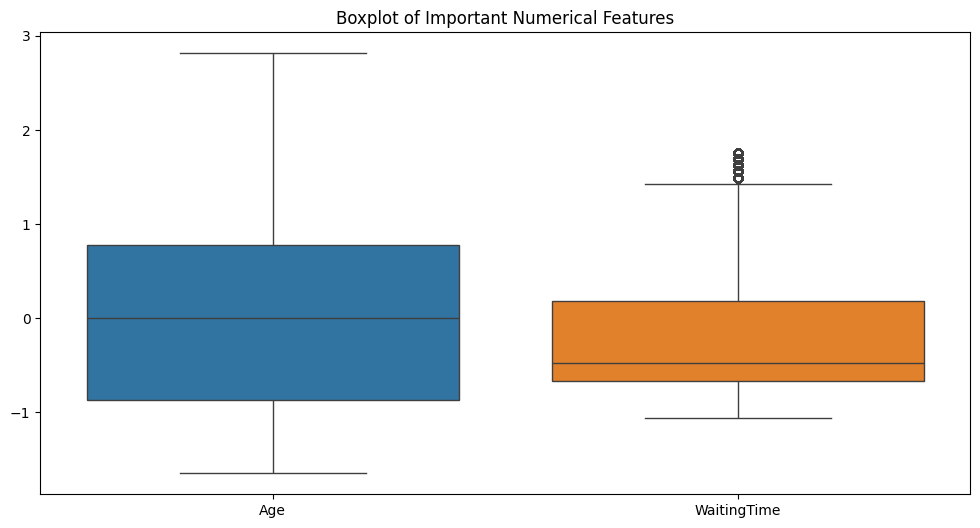

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_merged[numerical_features])
plt.title("Boxplot of Important Numerical Features")
plt.show()

- A **boxplot** is used to visualize the distribution of key numerical features (`Age`, `WaitingTime`).
- This helps in checking for **remaining outliers** and understanding the range of values for each feature.


#### Pairplot for Feature Relationships

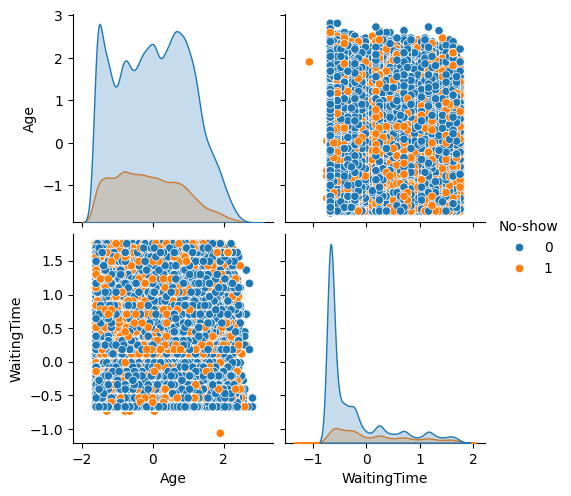

In [37]:
sns.pairplot(train_merged, vars=["Age", "WaitingTime"], hue="No-show", diag_kind="kde")
plt.show()



- A **pairplot** is generated to examine relationships between `Age`, `WaitingTime`, and the target variable (`No-show`).
- The `hue="No-show"` argument colors data points based on whether a patient attended (`0`) or missed (`1`) the appointment.
- The **diagonal plots** represent **Kernel Density Estimates (KDE)** for understanding feature distributions.


## Creating and Saving the Final Submission File

In [38]:
submission_columns = test.columns.tolist() + ["No-show"]
submission = test.copy()
submission["No-show"] = test_probs
submission = submission[submission_columns]

submission_file_path = "final_submission.csv"
submission.to_csv(submission_file_path, index=False)

print(f"Final submission file saved at: {submission_file_path}")

Final submission file saved at: final_submission.csv




- A **submission file** is created by:
  1. Copying the test dataset.
  2. Adding the predicted `No-show` probabilities.
  3. Reordering columns for consistency.
  4. Saving the file as `"final_submission.csv"` for submission.

- This file is **ready for evaluation** and can be uploaded to a competition or used for real-world predictions.
